# One Sample Z-Test

Test formula:

# $ z = \frac{\overline{x}-\mu}{\sigma_{\overline{x}}} $

Subcomponents of test formula:

## $ \sigma_{\overline{x}} = \sqrt{\frac{\sigma^2}{n}} $

### $ \sigma^2 = \frac{\sum_{i=1}^{n}(X_i - \mu)^2}{N} $

Population Mean: 100.0782
Population Variance: 397.13368476000153
Sample Mean: 161.416
Sample Size: 500
Z of sample =  68.8248
P-value =  0.0

Coin toss: Tails
Heads means the sample was drawn from the population being tested against, which has a mean of 100.0782 . Tails means the sample was drawn from a different population with a mean of 160. Over repeated iterations of the code, "tails" will lead to more extreme Z-scores.



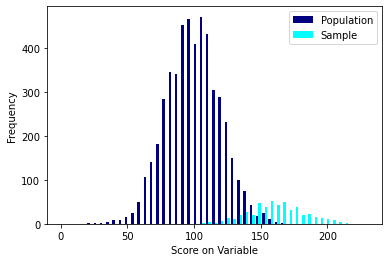

In [1]:
import numpy as np
import scipy.stats
import statistics as stats
import random
import math 
import matplotlib.pyplot as plt

# creating a population of random scores:

population = []

for i in range(5000):
    population.append(round(20*np.random.randn()+100))
    
# calculating population mean and variance

pop_mean = stats.mean(population)
print('Population Mean:', pop_mean)

sq_pop_dev = []
for i in population:
    sq_pop_dev.append((i - pop_mean)**2)
    
pop_var = sum(sq_pop_dev)/len(population)
print('Population Variance:', pop_var)


# using a 'coin flip' to decide whether to randomly sample 20 scores from the population created earlier.
# Or whether to from a population with a different mean:

population_2 = []

count = 0
for i in range(5000):
    population_2.append(round(20*np.random.randn()+160))
    count = count + 1

coin = ['Heads', 'Tails']

coin_toss = np.random.choice(coin)

if coin_toss == 'Heads':
    sample = random.sample(population,500)

elif coin_toss == 'Tails':
    sample = random.sample(population_2, 500)
     

# calculating the sample mean:

sample_mean = stats.mean(sample)
print('Sample Mean:', sample_mean)
print('Sample Size:', len(sample))

# calculating the test statistics

std_error_mean = np.sqrt(pop_var/len(sample))

z_test = (sample_mean-pop_mean)/std_error_mean

print('Z of sample = ', round(z_test,4))
print('P-value = ', 2*(1 - scipy.stats.norm.cdf(abs(z_test))))

# information about the effect of the coin toss on the sample

print()
print('Coin toss:', coin_toss)
print('Heads means the sample was drawn from the population being tested against, which has a mean of', pop_mean,'. Tails means the sample was drawn from a different population with a mean of 160. Over repeated iterations of the code, "tails" will lead to more extreme Z-scores.')
print()

# plotting a histogram of the population and the sample

bins = np.linspace(1,230)
plt.hist([population, sample], bins, label = ['Population', 'Sample'], color = ['navy', 'cyan'])
plt.xlabel('Score on Variable')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
